# 🟩⬜🟥 COVID-19 Italy Analysis 🟩⬜🟥

In [1]:
#@title Importing the tools and the datasets
try:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import warnings
  warnings.simplefilter(action='ignore', category=FutureWarning)
  import logging, sys
  logging.disable(sys.maxsize)

  # Set a default file path
  DATA_PATH = "data/"

  # Import the datasets
  df_naz = pd.read_csv(DATA_PATH+"dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv",
                      parse_dates=["data"])
  df_reg = pd.read_csv(DATA_PATH+"dati-regioni/dpc-covid19-ita-regioni.csv",
                      parse_dates=["data"])
  df_reg_latest = pd.read_csv(DATA_PATH+"dati-regioni/dpc-covid19-ita-regioni-latest.csv",
                              parse_dates=["data"])
  df_prov = pd.read_csv(DATA_PATH+"dati-province/dpc-covid19-ita-province.csv",
                        parse_dates=["data"])
  df_prov_latest = pd.read_csv(DATA_PATH+"dati-province/dpc-covid19-ita-province-latest.csv",
                              parse_dates=["data"])
  print("Successful Import of Tools and Datasets.")
except:
  print("Error in Import of Tools and Datasets, try again.")

Successful Import of Tools and Datasets.


In [2]:
#@title Same important information about COVID-19 in Italy
print(f"Total number of Confirmed COVID 2019 cases across Italy:            {df_naz.totale_casi[len(df_naz)-1]}")
print(f"Total number of Active COVID 2019 cases across Italy:               {df_naz.totale_attualmente_positivi[len(df_naz)-1]}")
print(f"Total number of Discharged Healed COVID 2019 cases across Italy:    {df_naz.dimessi_guariti[len(df_naz)-1]}")
print(f"Total number of Death due to COVID 2019 across Italy:               {df_naz.deceduti[len(df_naz)-1]}")
print(f"Total number ICU People due to COVID 2019 across Italy:             {df_naz.terapia_intensiva[len(df_naz)-1]}")
print(f"Total numebr of Used Swabs due to COVID 2019 across Italy:          {df_naz.tamponi[len(df_naz)-1]}")

Total number of Confirmed COVID 2019 cases across Italy:            69176
Total number of Active COVID 2019 cases across Italy:               54030
Total number of Discharged Healed COVID 2019 cases across Italy:    8326
Total number of Death due to COVID 2019 across Italy:               6820
Total number ICU People due to COVID 2019 across Italy:             3396
Total numebr of Used Swabs due to COVID 2019 across Italy:          296964


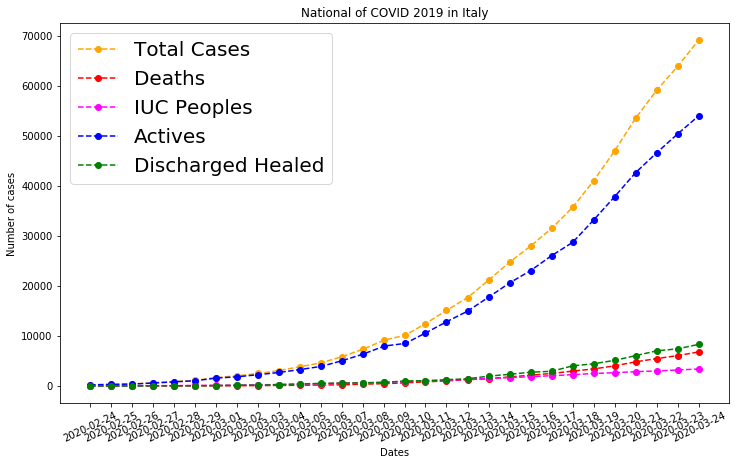

In [3]:
#@title Trend of COVID 2019 in Italy
fig, ax = plt.subplots(figsize=(12, 7))

ax.plot(df_naz.data, df_naz.totale_casi, c="orange", label="Total Cases", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.deceduti, c="red", label="Deaths", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.terapia_intensiva, c="magenta", label="IUC Peoples", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.totale_attualmente_positivi, c="blue", label="Actives", linestyle="--", marker="o")
ax.plot(df_naz.data, df_naz.dimessi_guariti, c="green", label="Discharged Healed", linestyle="--", marker="o")
ax.legend(prop={"size": 20})
ax.set_title("National of COVID 2019 in Italy")
ax.set_xlabel("Dates")
ax.set_ylabel("Number of cases")

# Create a unique xticks dates list
xticks_list = [d for idx, d in enumerate(df_naz.data)]
plt.xticks(xticks_list, rotation=25)

fig.savefig(DATA_PATH+"figs/trend-of-covid-19-in-italy.png")
plt.show()

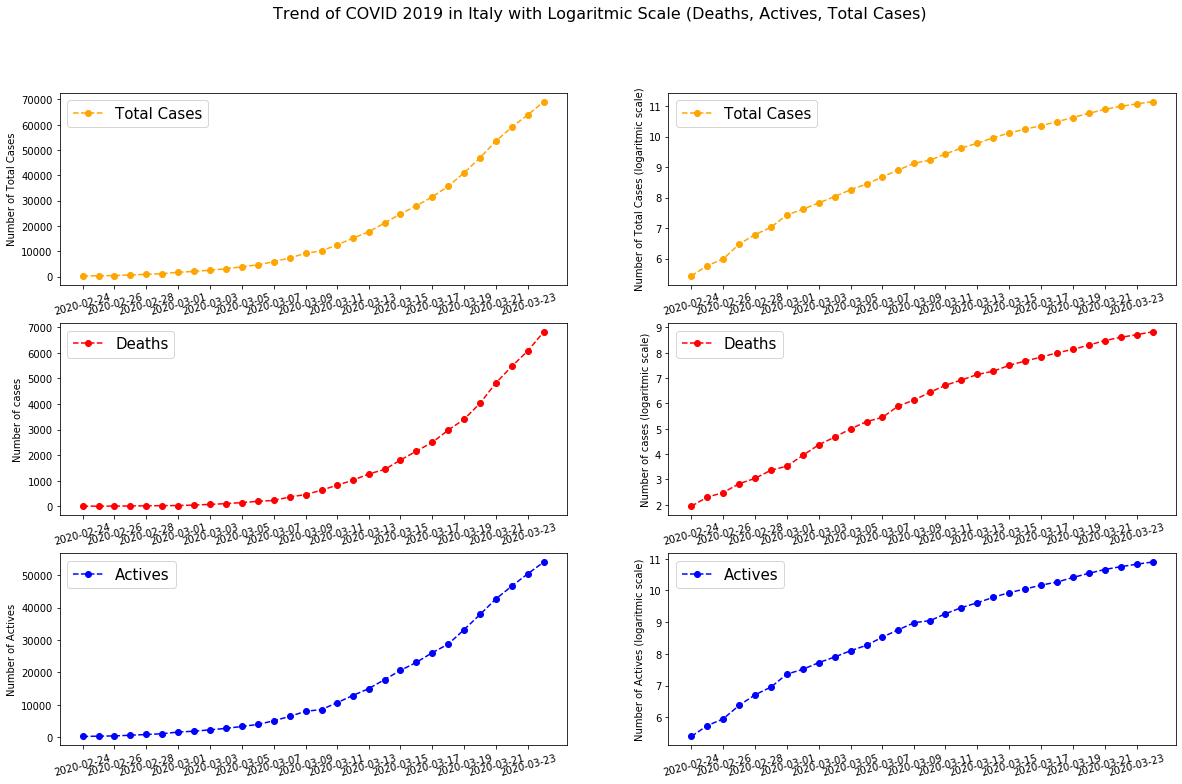

In [4]:
#@title Trend of COVID 2019 in Italy with Logaritmic Scale (Deaths, Actives, Total Cases)
# Create a unique list of dates for xlabel
xticks_list = [d for idx, d in enumerate(df_naz.data) if idx % 2 == 0]

fig = plt.figure(figsize=(20, 12))

fig.suptitle('Trend of COVID 2019 in Italy with Logaritmic Scale (Deaths, Actives, Total Cases)', fontsize=16)

ax0 = plt.subplot(3, 2, 1)
ax0.plot(df_naz.data, df_naz.totale_casi, c="orange", label="Total Cases", linestyle="--", marker="o")
ax0.legend(prop={"size": 15})
ax0.set_ylabel("Number of Total Cases")

plt.xticks(xticks_list, rotation=15)

ax1 = plt.subplot(3, 2, 2)
ax1.plot(df_naz.data, np.log(df_naz.totale_casi), c="orange", label="Total Cases", linestyle="--", marker="o")
ax1.legend(prop={"size": 15})
ax1.set_ylabel("Number of Total Cases (logaritmic scale)")

plt.xticks(xticks_list, rotation=15)

ax2 = plt.subplot(3, 2, 3)
ax2.plot(df_naz.data, df_naz.deceduti, c="red", label="Deaths", linestyle="--", marker="o")
ax2.legend(prop={"size": 15})
ax2.set_ylabel("Number of cases")

plt.xticks(xticks_list, rotation=15)

ax3 = plt.subplot(3, 2, 4)
ax3.plot(df_naz.data, np.log(df_naz.deceduti), c="red", label="Deaths", linestyle="--", marker="o")
ax3.legend(prop={"size": 15})
ax3.set_ylabel("Number of cases (logaritmic scale)")

plt.xticks(xticks_list, rotation=15)

ax4 = plt.subplot(3, 2, 5)
ax4.plot(df_naz.data, df_naz.totale_attualmente_positivi, c="blue", label="Actives", linestyle="--", marker="o")
ax4.legend(prop={"size": 15})
ax4.set_ylabel("Number of Actives")

plt.xticks(xticks_list, rotation=15)

ax5 = plt.subplot(3, 2, 6)
ax5.plot(df_naz.data, np.log(df_naz.totale_attualmente_positivi), c="blue", label="Actives", linestyle="--", marker="o")
ax5.legend(prop={"size": 15})
ax5.set_ylabel("Number of Actives (logaritmic scale)")

plt.xticks(xticks_list, rotation=15)

fig.savefig(DATA_PATH+"/figs/trend-of-covid-19-in-italy-with-logaritmic-scale-deaths-actives-total-cases.png")
plt.show()

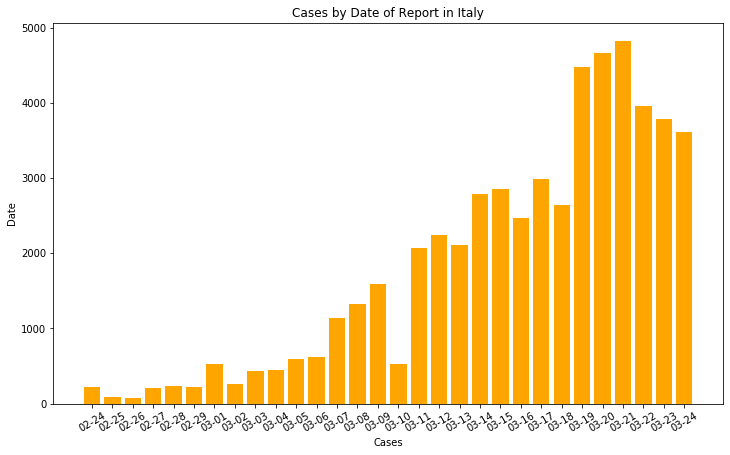

In [5]:
#@title Cases by Date of Report
fig, ax = plt.subplots(figsize=(12, 7))

# Create a unique x axis dates list
x_axis_list = [str(d).replace("2020-", "").replace(" 18:00:00", "").replace(" 17:00:00", "") for idx, d in enumerate(df_naz.data)]
ax.bar(x_axis_list, df_naz.nuovi_attualmente_positivi, color="orange")
ax.set(title="Cases by Date of Report in Italy",
       xlabel="Cases",
       ylabel="Date")

plt.xticks(rotation=30)

fig.savefig(DATA_PATH+"figs/cases-by-date-of-report-covid-19-in-italy.png")
plt.show()

## Analysis by Regions of Italy

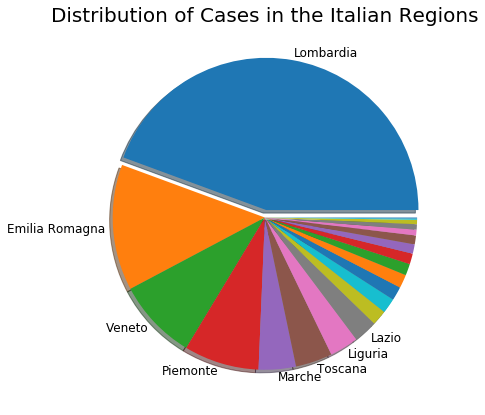

In [6]:
#@title Distribution of Cases in the Italian Regions - Pie Chart
fig, ax = plt.subplots(figsize=(7, 7))

df_reg_tmp = df_reg_latest.sort_values(by=["totale_casi"], ascending=False)
fracs = [round(frac/len(df_reg_latest), 2) for frac in df_reg_tmp.totale_casi]
labels = [reg for reg in df_reg_tmp.denominazione_regione[df_reg_tmp.totale_casi > 1700]]
labels_left = ["" for _ in range(len(df_reg_tmp)-len(labels))]
labels.extend(labels_left)
explode_list = [0 for _ in range(len(df_reg_tmp)-1)]
explode_list.insert(0, 0.05)

ax.pie(fracs, explode=explode_list, labels=labels, shadow=True, textprops={"size": 12}, labeldistance=1.05)
ax.set_title("Distribution of Cases in the Italian Regions", size=20)

fig.savefig(DATA_PATH+"figs/regions/distribution-of-cases-italian-regions-covid-19.png")
plt.show()

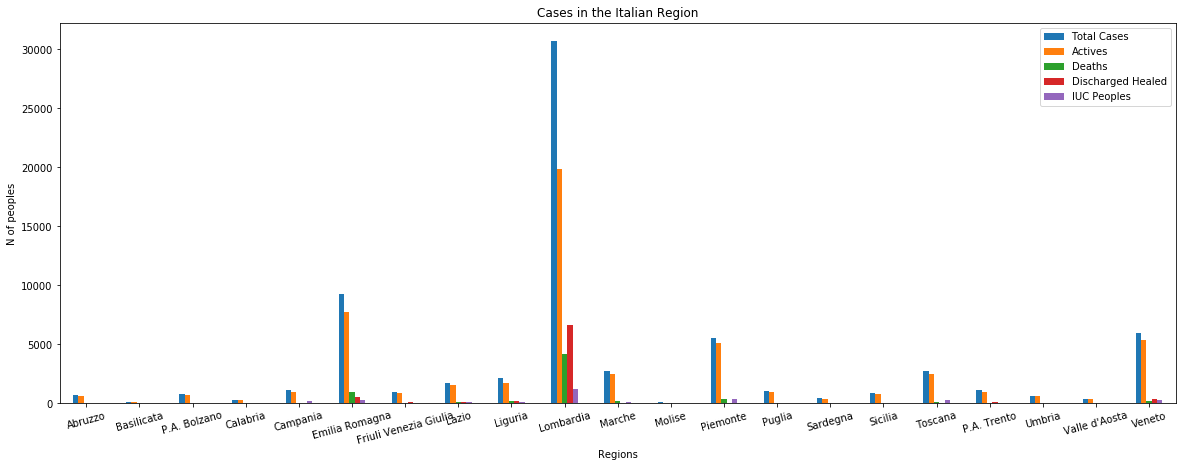

In [7]:
#@title Cases in the Italian Region
df_reg_tmp = pd.DataFrame({"Total Cases": df_reg_latest.totale_casi,
                           "Actives": df_reg_latest.totale_attualmente_positivi,
                           "Deaths": df_reg_latest.deceduti,
                           "Discharged Healed": df_reg_latest.dimessi_guariti,
                           "IUC Peoples": df_reg_latest.terapia_intensiva})
df_reg_tmp.index = df_reg_latest.denominazione_regione

df_reg_tmp.plot.bar(figsize=(20, 7))
plt.title("Cases in the Italian Region")
plt.xlabel("Regions")
plt.ylabel("N of peoples")
plt.xticks(rotation=15)

plt.savefig(DATA_PATH+"figs/regions/cases-in-the-italian-regions-covid-19.png")
plt.show()

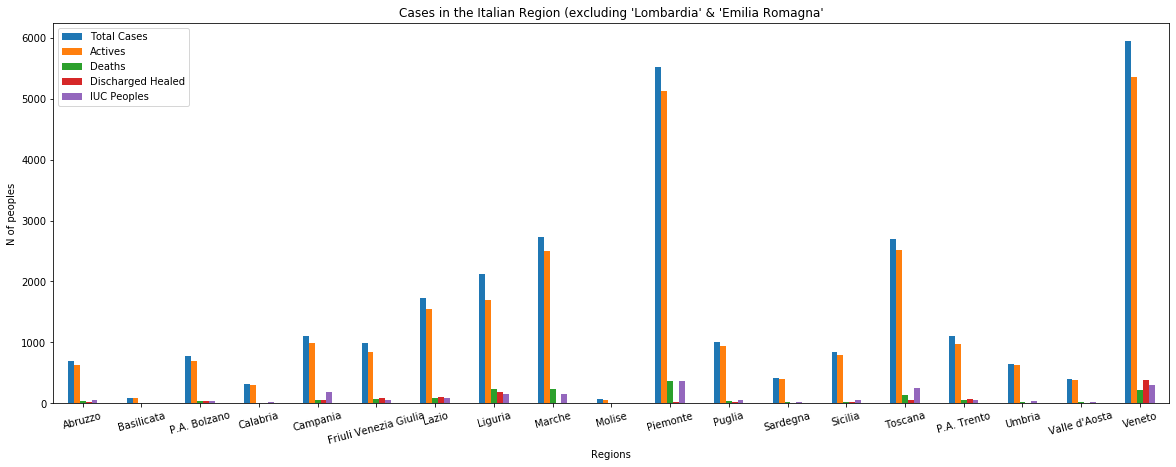

In [8]:
#@title Cases in the Italian Region (exluding 'Lomabrdia' & 'Emilia Romagna')
df_reg_tmp = pd.DataFrame({"Total Cases": df_reg_latest.totale_casi,
                           "Actives": df_reg_latest.totale_attualmente_positivi,
                           "Deaths": df_reg_latest.deceduti,
                           "Discharged Healed": df_reg_latest.dimessi_guariti,
                           "IUC Peoples": df_reg_latest.terapia_intensiva})
df_reg_tmp.index = df_reg_latest.denominazione_regione

# Remove 'Lombardia' & 'Emilia Romagna'
df_reg_tmp.drop("Lombardia", axis=0, inplace=True)
df_reg_tmp.drop("Emilia Romagna", axis=0, inplace=True)

df_reg_tmp.plot.bar(figsize=(20, 7))
plt.title("Cases in the Italian Region (excluding 'Lombardia' & 'Emilia Romagna'")
plt.xlabel("Regions")
plt.ylabel("N of peoples")
plt.xticks(rotation=15)

plt.savefig(DATA_PATH+"figs/regions/cases-in-the-italian-regions-covid-19-excluding-lombardia-and-emiliaromagna.png")
plt.show()

### Trend in the Regions of Italy - Time Evolution

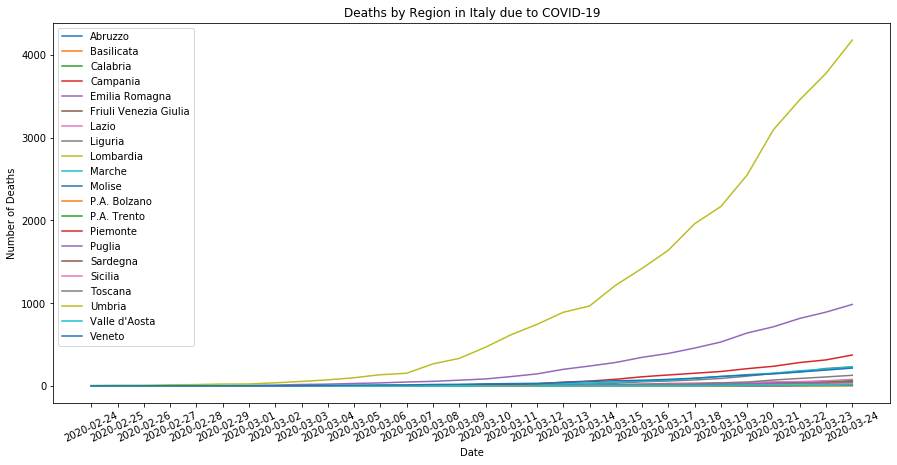

In [9]:
#@title Deaths by Region in Italy due to COVID-19
fig, ax = plt.subplots(figsize=(15, 7))

for reg in np.unique(df_reg.denominazione_regione):
  ax.plot(df_reg.data[df_reg.denominazione_regione == reg], df_reg.deceduti[df_reg.denominazione_regione == reg], label=reg)
  
ax.legend()
ax.set(title="Deaths by Region in Italy due to COVID-19",
       xlabel="Date",
       ylabel="Number of Deaths")

# Create a unique xticks dates list
xticks_list = [d for idx, d in enumerate(df_naz.data)]
plt.xticks(xticks_list, rotation=25)

fig.savefig(DATA_PATH+"/figs/regions/deaths-by-region-in-italy-due-to-covid-19.png")
plt.show()

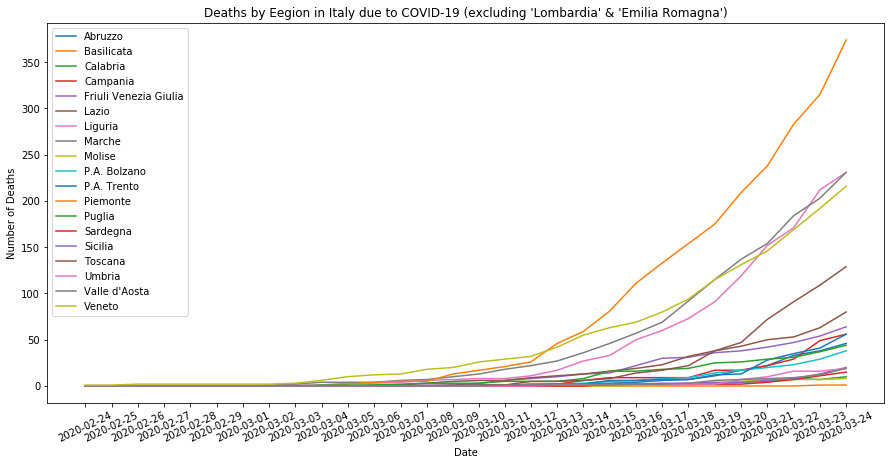

In [10]:
#@title Deaths by Region in Italy due to COVID-19 (excluding 'Lombardia' & 'Emilia Romagna')
fig, ax = plt.subplots(figsize=(15, 7))

for reg in np.unique(df_reg.denominazione_regione):
  if reg != "Lombardia" and reg != "Emilia Romagna":
    ax.plot(df_reg.data[df_reg.denominazione_regione == reg], df_reg.deceduti[df_reg.denominazione_regione == reg], label=reg)

ax.legend()
ax.set(title="Deaths by Eegion in Italy due to COVID-19 (excluding 'Lombardia' & 'Emilia Romagna')",
       xlabel="Date",
       ylabel="Number of Deaths")

# Create a unique xticks dates list
xticks_list = [d for idx, d in enumerate(df_naz.data)]
plt.xticks(xticks_list, rotation=25)

fig.savefig(DATA_PATH+"/figs/regions/deaths-by-region-in-italy-due-to-covid-19-excluding-lombardia-and-emiliaromagna.png")
plt.show()

In [11]:
#@title Last Update 
import datetime as dt
dt_string = dt.datetime.now().strftime("%d/%m/%Y-%H:%M:%S")
print(f"Kernel last updated: {dt_string}")

Kernel last updated: 24/03/2020-19:12:12
